# Data Analysis Workflow

## 1. Importing Libraries and Loading Data  

First, I import the necessary libraries and load the datasets into pandas DataFrames for manipulation and analysis.

In [30]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector

# Loading datasets
sales_data = pd.read_csv("sales_data.csv")
customer_data = pd.read_csv("customer_data.csv")

# Display the first 5 rows of each dataset
print("Sales Data Overview:")
print(sales_data.head())

print("\nCustomer Data Overview:")
print(customer_data.head())

Sales Data Overview:
  invoice_no customer_id  category  quantity    price invoice_date  \
0    I138884     C241288  Clothing         5  1500.40    5/14/2021   
1    I317333     C111565     Shoes         3  1800.51     9/9/2022   
2    I127801     C266599  Clothing         1   300.08     1/4/2021   
3    I173702     C988172     Shoes         5  3000.85     3/8/2022   
4    I337046     C189076     Books         4    60.60   10/15/2021   

    shopping_mall  
0          Kanyon  
1  Forum Istanbul  
2       Metrocity  
3    Metropol AVM  
4          Kanyon  

Customer Data Overview:
  customer_id  gender   age payment_method
0     C241288  Female  28.0    Credit Card
1     C111565    Male  21.0     Debit Card
2     C266599    Male  20.0           Cash
3     C988172  Female  66.0    Credit Card
4     C189076  Female  53.0           Cash


## 2. Checking Data Types, Missing Values, and Duplicates  

In this step, I inspect `sales_data.csv` dataset structure to ensure it is clean and ready for analysis. Key tasks include:  
- Verifying **column data types** to identify any necessary conversions.  
- Checking for **missing values** that need to be handled.  
- Detecting **duplicate rows** to remove redundancy.  

This foundational step provides an overview of the dataset, focusing on key identifiers, categories, and numerical features, ensuring accurate analysis in subsequent stages.


In [31]:
# Check data types and missing values
print("Sales Data Info:")
print(sales_data.info())

print("\nSales Data Missing Values:")
print(sales_data.isnull().sum())

# Check for duplicate rows
print("\nSales Data Duplicate")
duplicates = sales_data.duplicated().sum()
print(duplicates)

# Display duplicate rows
print("\nDuplicate Rows")
print(sales_data[sales_data.duplicated(keep=False)])

Sales Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99459 entries, 0 to 99458
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   invoice_no     99459 non-null  object 
 1   customer_id    99459 non-null  object 
 2   category       99459 non-null  object 
 3   quantity       99459 non-null  int64  
 4   price          99250 non-null  float64
 5   invoice_date   99457 non-null  object 
 6   shopping_mall  99459 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.3+ MB
None

Sales Data Missing Values:
invoice_no         0
customer_id        0
category           0
quantity           0
price            209
invoice_date       2
shopping_mall      0
dtype: int64

Sales Data Duplicate
1

Duplicate Rows
   invoice_no customer_id  category  quantity   price invoice_date  \
14    I179802     C312861  Clothing         2  600.16     8/4/2021   
15    I179802     C312861  Clothing         

## Step 3: Handling Missing Values and Data Type Conversion

In [5]:
#fill missing values in column 'price' with median because outlier has detected
sales_data['price'] = sales_data['price'].fillna(sales_data['price'].median())
#change the data type in column 'invoice_date' because now invoice_date column is object not date time
sales_data['invoice_date'] = pd.to_datetime(sales_data['invoice_date'], errors = 'coerce')
#fill missing values in column 'invoice_date' with ffill to fill with forward fill to fill in.
sales_data['invoice_date'] = sales_data['invoice_date'].ffill()

In [6]:
#check missing values agian
print(sales_data.isnull().sum())

invoice_no       0
customer_id      0
category         0
quantity         0
price            0
invoice_date     0
shopping_mall    0
dtype: int64


There is no missing values now so I will deal with outlier in the next step

## Step 5: Detecting and Handling Outliers

<function matplotlib.pyplot.show(close=None, block=None)>

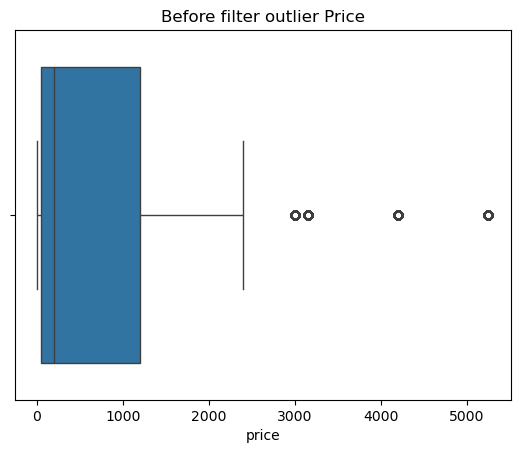

In [7]:
#Make the boxplot to see data distribution
sns.boxplot(x=sales_data['price'])
plt.title("Before filter outlier Price")
plt.show

The boxplot shows that the median is located closer to Q1, indicating that the data is right-skewed. The whisker extends far to the right, which further confirms the skewness. Additionally, there are several outliers starting from a price of 3000 and above.

### Removing Outliers Using IQR Method

In [8]:
#In this step, we calculate the IQR to detect and remove outliers.
Q1 = sales_data['price'].quantile(0.25)
Q3 = sales_data['price'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

#Filtering Data to Remove Outliers 
sales_data = sales_data[(sales_data['price'] >= lower_bound) & (sales_data['price'] <= upper_bound)]

In [9]:
sales_data.describe()

,quantity,price,invoice_date
count,94446.000000,94446.000000,94446
mean,2.929304,527.348820,2022-01-26 17:48:27.032590080
min,1.000000,5.230000,2021-01-01 00:00:00
25%,2.000000,40.660000,2021-06-30 00:00:00
50%,3.000000,203.300000,2022-01-29 00:00:00
75%,4.000000,900.240000,2022-08-05 00:00:00
max,5.000000,2400.680000,2023-12-02 00:00:00
std,1.399859,613.576853,NaN


Check the box plot agian

<function matplotlib.pyplot.show(close=None, block=None)>

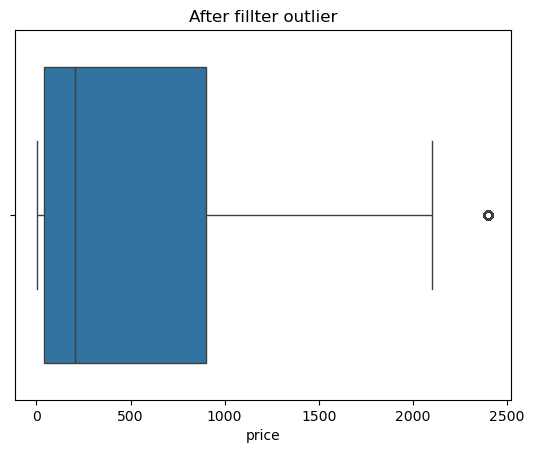

In [10]:
sns.boxplot(x = sales_data['price'])
plt.title("After fillter outlier")
plt.show

sales data is already clean, next step I will check for customer_data.csv

In [11]:
#Check data type and missing values in customer_data.csv
print("Customer Data Info:")
print(customer_data.info())
print("\nCustomer Data Missing Values:")
print(customer_data.isnull().sum())

Customer Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     99457 non-null  object 
 1   gender          99457 non-null  object 
 2   age             99338 non-null  float64
 3   payment_method  99457 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.0+ MB
None

Customer Data Missing Values:
customer_id         0
gender              0
age               119
payment_method      0
dtype: int64


In [12]:
#Fill Missing Value


## 3. Handling Missing Values  

To ensure data quality and maintain accuracy, I handle missing values as follows:  

- **Price**: Missing values are filled with the **median** to reduce the impact of outliers.  
- **Invoice Date**: The column is converted to **datetime format**, and missing values are filled using **forward fill (ffill)** to propagate previous values.  

These steps ensure that the dataset remains consistent and complete for further analysis.



## Introduction

This project focuses on cleaning and analyzing a sales dataset to ensure it is ready for further exploration and analysis. The primary tasks include handling missing values, removing duplicates, and detecting outliers. By performing these steps, I ensure data quality and reliability for generating meaningful insights.



## Purpose of the Project  

The goal of this project is to:  
1. Ensure the dataset is clean, accurate, and free from inconsistencies.  
2. Identify and resolve missing values, duplicates, and outliers.  
3. Prepare the data for exploratory analysis, visualization, and potential modeling.  

This structured approach ensures high-quality data that can drive actionable business insights.



## 3. Handling Missing Values  

To ensure data quality and maintain accuracy, I handle missing values as follows:  

- **Price**: Missing values are filled with the **median** to reduce the impact of outliers.  
- **Invoice Date**: The column is converted to **datetime format**, and missing values are filled using **forward fill (ffill)** to propagate previous values.  

These steps ensure that the dataset remains consistent and complete for further analysis.



## Conclusion of Analysis  

By handling missing values, removing duplicates, and filtering outliers, the dataset is now clean, reliable, and ready for further analysis. This process ensures:  
1. Accurate insights based on complete and high-quality data.  
2. A strong foundation for exploratory data analysis (EDA) and advanced modeling.  

Next steps include exploring patterns, trends, and relationships in the cleaned data to generate actionable business insights.
